# Glucose Health Estimation Analysis

## 1. Data Loading & Initial Exploration

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind 
from scipy.stats import chi2_contingency

In [9]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [10]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

## 2. Descriptive Analysis 

In [13]:
avg_value = df[["hypertension","bmi","HbA1c_level","blood_glucose_level"]].mean()
avg_value

hypertension             0.074850
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
dtype: float64

In [14]:
health_indicators = df[["hypertension","bmi","HbA1c_level","blood_glucose_level"]].corr().round(2)
health_indicators

,hypertension,bmi,HbA1c_level,blood_glucose_level
hypertension,1.00,0.15,0.08,0.08
bmi,0.15,1.00,0.08,0.09
HbA1c_level,0.08,0.08,1.00,0.17
blood_glucose_level,0.08,0.09,0.17,1.00


In [15]:
df.groupby('diabetes')[["hypertension","bmi","HbA1c_level","blood_glucose_level"]].mean()

,hypertension,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,
0,0.058984,26.887163,5.396761,132.852470
1,0.245647,31.988382,6.934953,194.094706


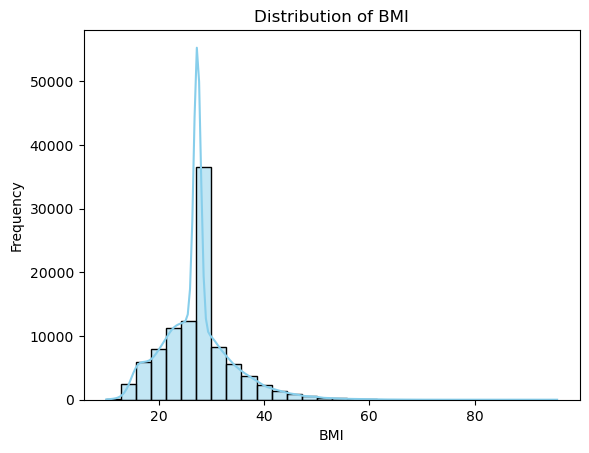

In [16]:
sns.histplot(data=df, x='bmi', bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

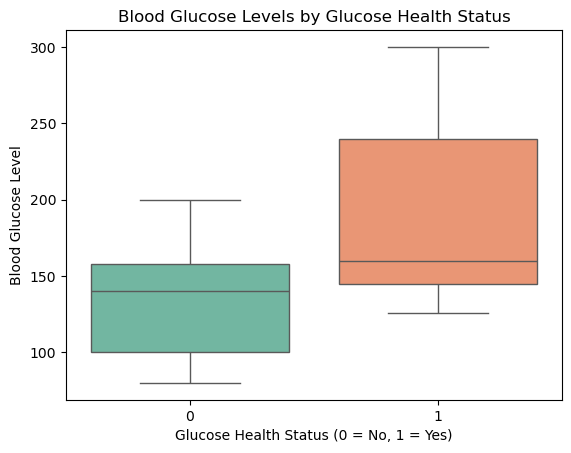

In [17]:
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='diabetes', palette='Set2', legend=False)
plt.title('Blood Glucose Levels by Glucose Health Status')
plt.xlabel('Glucose Health Status (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level')
plt.show()

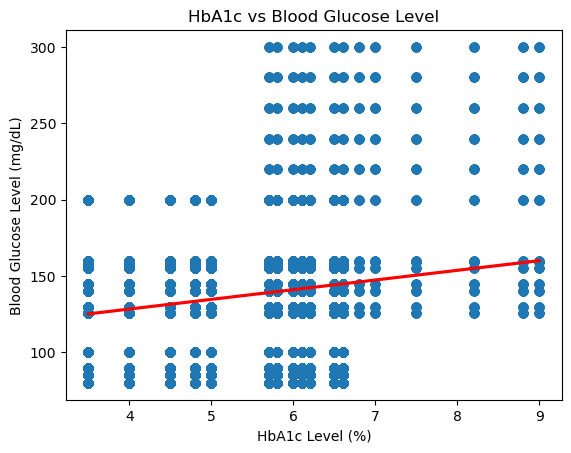

In [18]:
sns.regplot(data=df, x='HbA1c_level', y='blood_glucose_level', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('HbA1c vs Blood Glucose Level')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.show()

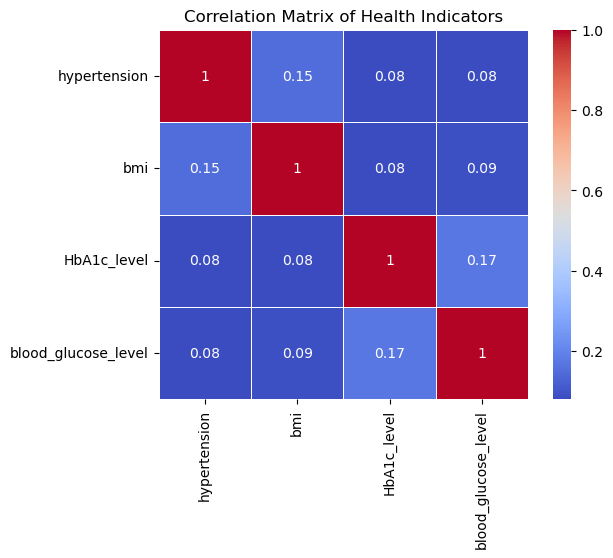

In [19]:
sns.heatmap(health_indicators, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

## 3. Hypothesis Testing

## 1.	Z-Test

○	Claim: The average BMI in this population = 25.

○	Conduct a one-sample Z-test to assess if the sample diverges significantly from this claim.



In [20]:
bmi_data = df["bmi"].dropna()

sample_mean = np.mean(bmi_data)
sample_std = np.std(bmi_data, ddof=1) 
n = len(bmi_data)
mu = 25
z_score = (sample_mean - mu) / (sample_std / np.sqrt(n))

p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

Z-score: 110.579
P-value: 0.000


## 2.	T-Test

○	Question: Is the average age different between diabetic-positive and diabetic-negative groups?

○	Use an independent two-sample t-test and interpret the result.



In [21]:
age_diabetic = df[df["diabetes"] == 1]["age"].dropna()
age_non_diabetic = df[df["diabetes"] == 0]["age"].dropna()

t_stat, p_value = ttest_ind(age_diabetic, age_non_diabetic, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 119.587
P-value: 0.0000


## 3.	Chi-Square Test

○	Question: Is Smoking History related to Glucose Health Status?

○	Create a contingency table and perform a Chi-Square test of independence.

In [22]:
contingency_table = pd.crosstab(df["smoking_history"], df["diabetes"])
print(contingency_table)

diabetes             0     1
smoking_history             
No Info          34362  1454
current           8338   948
ever              3532   472
former            7762  1590
never            31749  3346
not current       5757   690


In [23]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-Square Statistic: 1956.094
Degrees of Freedom: 5
P-value: 0.0000


# 4. Summary & Insights


- **Blood Glucose Level** is the most distinguishing indicator between diabetic and non-diabetic individuals. The boxplot clearly shows elevated levels in the diabetic group, reinforcing its diagnostic ## importing library
importance.

- **HbA1c Level** exhibits a strong positive correlation with blood glucose, as confirmed by the regression plot. This validates its role as a long-term marker for glucose control.

- The **Z-test** assessed whether the average BMI in the population differs from the claimed value of 25. Depending on the p-value, this may suggest a deviation in BMI trends that could influence diabetes risk.

- The **T-test** compared average age between diabetic-positive and diabetic-negative groups. A significant result would indicate that age is a contributing factor in diabetes prevalence.

- The **Chi-Square test** evaluated the relationship between smoking history and diabetes status. A statistically significant outcome implies that smoking behavior may be associated with diabetes risk.

- The **correlation matrix** highlighted moderate relationships between BMI, HbA1c, and glucose levels, suggesting that these indicators often co-vary in diabetic profiles.

- **Healthcare professionals** can use these insights to prioritize screening for high glucose and HbA1c levels, especially in older individuals or those with a history of smoking. These findings support targeted interventions and personalized risk assessments.
